In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('game data.csv')

In [3]:
data

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [4]:
df = data.drop(columns=['Days'],axis=1)

In [5]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [7]:
x = df.drop('Wear Jacket?',axis=1)

In [8]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [9]:
y = df['Wear Jacket?']

In [10]:
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
x.Outlook = le.fit_transform(df['Outlook'])

In [17]:
x

,Outlook,Temprature,Routine
0,1,Cold,Indoor
1,0,Cold,Indoor
2,0,Warm,Outdoor
3,1,Cold,Outdoor
4,0,Cold,Outdoor
5,1,Warm,Outdoor
6,0,Warm,Indoor
7,1,Warm,Indoor


In [18]:
x.Temprature = le.fit_transform(df['Temprature'])

In [19]:
x

,Outlook,Temprature,Routine
0,1,0,Indoor
1,0,0,Indoor
2,0,1,Outdoor
3,1,0,Outdoor
4,0,0,Outdoor
5,1,1,Outdoor
6,0,1,Indoor
7,1,1,Indoor


In [21]:
x.Routine = le.fit_transform(df['Routine'])

In [22]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier()

In [23]:
clf.fit(x,y)

DecisionTreeClassifier()

In [25]:
clf.predict([[1,0,1]])

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

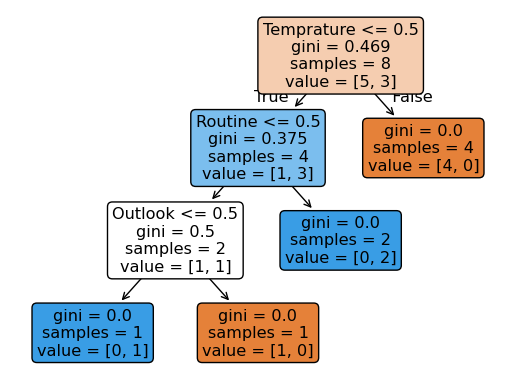

In [29]:
from sklearn import tree
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)